# Image Gradient in OpenCV

In OpenCV, an image gradient refers to the change in intensity or color across an image. It provides information about the rate and direction of change in pixel values within an image. Image gradients are fundamental in computer vision and image processing for tasks like edge detection, feature extraction, and image enhancement. OpenCV provides various functions to compute image gradients, typically in the form of gradients in the x and y directions.

Here are some key concepts related to image gradients in OpenCV:

1. **Sobel Operator**:
   - The Sobel operator is commonly used to calculate image gradients. It consists of two 3x3 convolution kernels, one for computing the gradient in the x-direction and another for the y-direction.
   - The Sobel operator emphasizes edges by detecting the rate of change of intensity in both horizontal and vertical directions.

2. **Scharr Operator**:
   - The Scharr operator is similar to the Sobel operator but has slightly different convolution kernels. It is known for providing better rotation symmetry and improved performance compared to the Sobel operator.

3. **Laplacian Operator**:
   - The Laplacian operator calculates the second derivative of the image, which provides information about regions of rapid intensity change, such as edges and corners.
   - It can be used for edge detection or image sharpening.

4. **Gradient Magnitude and Direction**:
   - Image gradients can be combined to calculate the magnitude and direction of the gradient at each pixel.
   - The gradient magnitude represents the strength of the change in intensity, and the gradient direction gives the direction of the change.

Here's an example of how to compute and visualize the gradient magnitude of an image using OpenCV in Python:

```python
import cv2
import numpy as np

# Read an image
image = cv2.imread('input.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the gradient in the x and y directions using the Sobel operator
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the original image and gradient magnitude
cv2.imshow('Original Image', image)
cv2.imshow('Gradient Magnitude', gradient_magnitude.astype(np.uint8))

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()
```

In this example, we read an image, calculate the gradient in the x and y directions using the Sobel operator, compute the gradient magnitude, and display both the original image and the gradient magnitude. The gradient magnitude image highlights edges and areas of rapid intensity change in the original image.

Image gradients are valuable for various computer vision tasks, including edge detection, object recognition, and texture analysis. They provide essential information for understanding the structure and content of images.

In [1]:
import cv2
import numpy as np

# Read an image
image = cv2.imread('Images/pexels-og-mpango-3041110.jpg', cv2.IMREAD_GRAYSCALE)
image=cv2.resize(image,(500,500))

# Calculate the gradient in the x and y directions using the Sobel operator
gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

# Display the original image and gradient magnitude
cv2.imshow('Original Image', image)
cv2.imshow('Gradient Magnitude', gradient_magnitude.astype(np.uint8))

# Wait for a key press and close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()


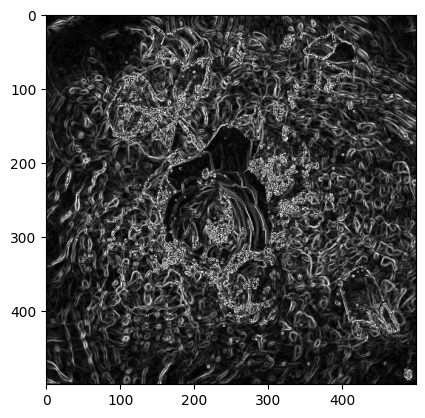

In [2]:
import matplotlib.pyplot as plt
plt.imshow(gradient_magnitude.astype(np.uint8),cmap='gray')

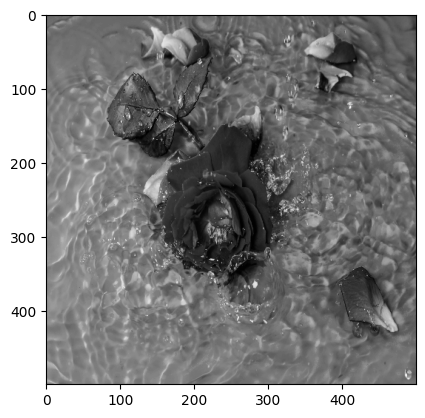

In [3]:
plt.imshow(image,cmap='gray')

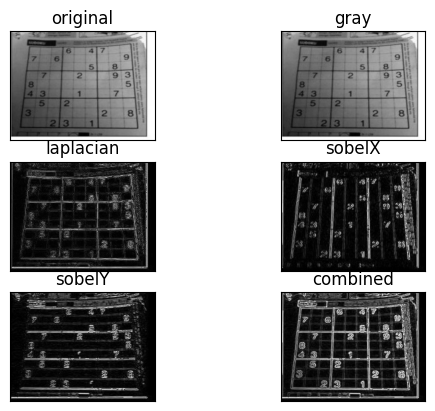

In [6]:
#Image Gradient--
#It is a directional change in the color or intensity in an image.
#It is most important part to find inormation from image
#Like finding edges within the images.
#There are various methods to find image gradient.
#These are - Laplacian Derivatives,SobelX and SobelY.
#All these functions have diff. mathematical approach to get result.
#All load image in the gray scale

#Don't Worry about Mathematics behind all these function
#we just use these to get our work in easy manner.
  
import cv2
import numpy as np


#load image into gray scale
img = cv2.imread("Images/page.jpg")
img = cv2.resize(img,(400,300))
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Laplacian Derivative---It calculate laplace derivate
#parameter(img,data_type for -ve val,ksize)
#kernal size must be odd
lap = cv2.Laplacian(img_gray,cv2.CV_64F,ksize = 3) #also pass kernal size
lap = np.uint8(np.absolute(lap))

#Sobel operation - 
# is a joint Gausssian smoothing plus differentiation operation, 
#so it is more  resistant to noise
#This is use for x and y bth
#parameter (img,type for -ve val,x = 1,y = 0,ksize)
#Sobel X focus on vertical lines
#Sobel y focus on horizontal lines

sobelX = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize = 3) #here 1 means x direction
sobelY = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize = 3) #here 1 means y direction

sobelX = np.uint8(np.absolute(sobelX))
sobelY= np.uint8(np.absolute(sobelY))

#finally combine sobelX and sobelY togather
sobelcombine = cv2.bitwise_or(sobelX,sobelY)

cv2.imshow("original==",img)
cv2.imshow("gray====",img_gray)
cv2.imshow("Laplacian==",lap)
cv2.imshow("SobelX===",sobelX)
cv2.imshow("SobelY==",sobelY)
cv2.imshow("COmbined image==",sobelcombine)



#Now plot all the images on graph
titles = ["original","gray","laplacian","sobelX","sobelY","combined"]
images = [img,img_gray,lap,sobelX,sobelY,sobelcombine]

#if you want then plot it
from matplotlib import pyplot as plt
for i in range(6):
    plt.subplot(3,2, i+1), 
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

cv2.waitKey(0)
cv2.destroyAllWindows()